In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rand
import numpy as np
%matplotlib inline

In [5]:
G = nx.Graph()
N = 25

#Add nodes to graph
for i in range(1, N+1):
    G.add_node(i)

In [6]:
#Randomly connect nodes to neighbors
#connectedness is between zero and one, the number of sampled
#connections a node makes a proportion of N. 

def connect(node, connectedness):
    other_nodes_bin = []
    for i in range(1,N+1):
        if i != node:
            other_nodes_bin.append(i)
    if connectedness == "unit":
        random_connection = np.unique(rand.sample(other_nodes_bin, 1))
    else:
        random_connection = np.unique(rand.sample(other_nodes_bin, round(connectedness*(N-1))))
    for j in random_connection:
        G.add_edge(node,j)
    for i in range(1,N+1):
        for k in other_nodes_bin:
            while nx.has_path(G,i,k) == False:
                G.remove_node(i)
                G.add_node(i)
                if connectedness == "unit":
                    random_connection = np.unique(rand.sample(other_nodes_bin, 1))
                else:
                    random_connection = np.unique(rand.sample(other_nodes_bin, round(connectedness*(N-1))))
                for j in random_connection:
                    G.add_edge(i,j)

In [7]:
for k in range(1,N+1):
    connect(k,"unit")

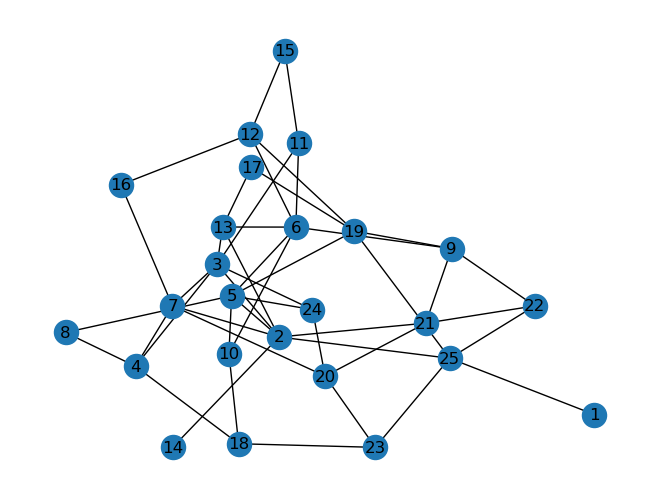

In [8]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()